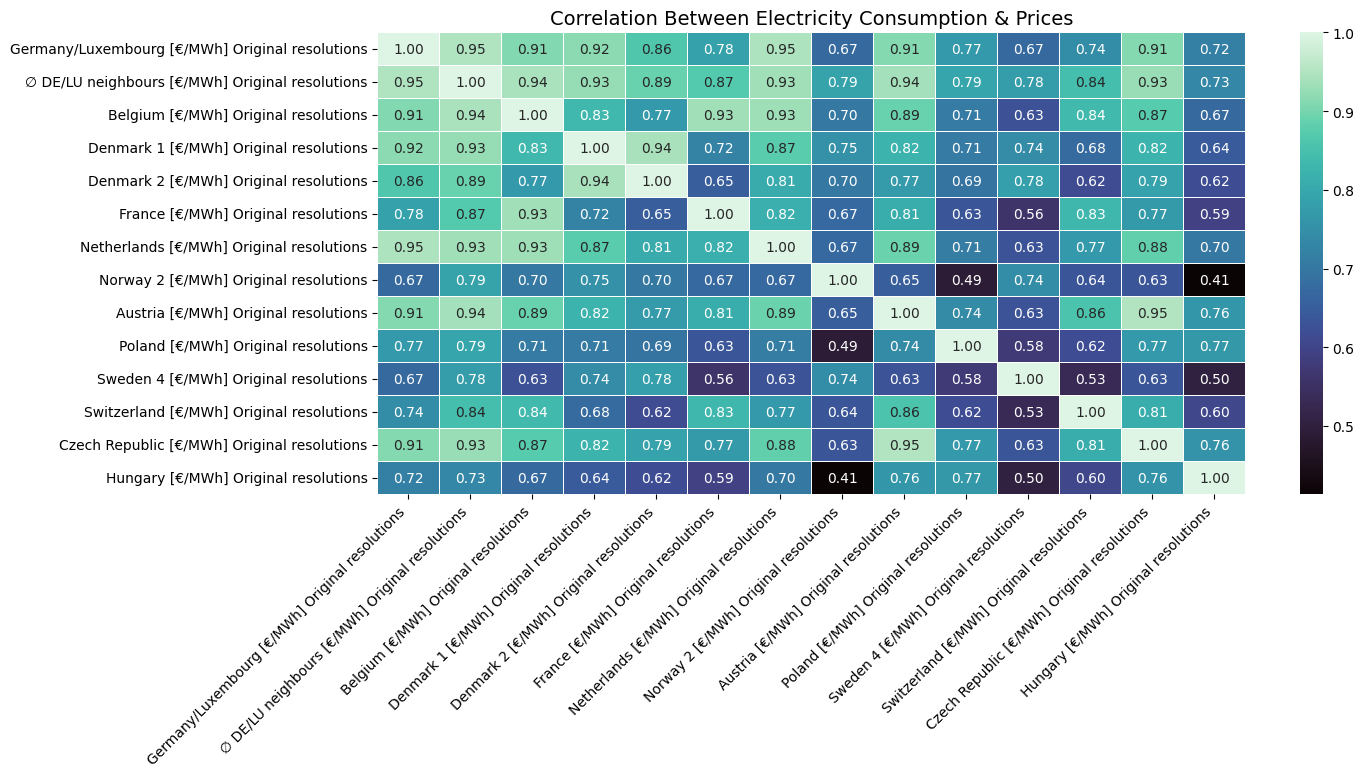

✅ Plot saved: c:\Users\Elite\Documents\Ocean\PowerCast The Electricity Price Forecasting Challenge\03_GridWise-Predictor\notebooks\..\visualizations\correlation_consumption_vs_price.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# =========================
# 📌 Define Paths
# =========================
BASE_DIR = os.getcwd()
PLOTS_DIR = os.path.join(BASE_DIR, "..", "visualizations")
os.makedirs(PLOTS_DIR, exist_ok=True)  # Ensure visualizations directory exists

# =========================
# 📌 Load Datasets
# =========================
price_file = "../data/transformed/transformed_refined_Day-ahead_prices_202301010000_202503050000_Hour.csv"
consumption_file = "../data/transformed/transformed_refined_Actual_consumption_202301010000_202503050000_Quarterhour.csv"

df_price = pd.read_csv(price_file, delimiter=",", low_memory=False)
df_consumption = pd.read_csv(consumption_file, delimiter=",", low_memory=False)

# =========================
# 📌 Convert Time Columns & Merge Data
# =========================
df_price["Start date"] = pd.to_datetime(df_price["Start date"])
df_consumption["Start date"] = pd.to_datetime(df_consumption["Start date"])

df_merged = df_price.merge(df_consumption, on="Start date", how="inner")

# =========================
# 📌 Compute Correlation Matrix
# =========================
df_numeric = df_merged.select_dtypes(include=["number"])  # Select only numeric columns
corr_matrix = df_numeric.corr()

# =========================
# 📌 Plot Heatmap
# =========================
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix, annot=True, cmap="mako", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Electricity Consumption & Prices", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Save and display the plot
plot_filename = "correlation_consumption_vs_price.png"
plt.savefig(os.path.join(PLOTS_DIR, plot_filename), dpi=300, bbox_inches="tight")
plt.show()
plt.close()

print(f"✅ Plot saved: {os.path.join(PLOTS_DIR, plot_filename)}")
